# BakeyBear

Where we aim to provide recipe proposals based on your remaining food.
Additionally, the final dish will be visualized so that you know what you are working for!

## Imports

In [2]:
import os
import re
import requests
import shutil

from openai import OpenAI
from PIL import Image


## OpenAI API

Set up your OpenAI API key here as an environment variable or directly hardcode it (not recommended).

In [3]:
client = OpenAI(api_key="")

### Tell GPT to generate a recipe
We will ask GPT to hand us a recipe based on the available ingredients. Additionally, a nice dish title should be given which we will subsequently use for visualization!

In [4]:
def create_system_prompt():
    return "You are a helpful cooking assistant."

def create_dish_prompt(list_of_ingredients):
    prompt = f"Create a detailed recipe based on only the following ingredients: {', '.join(list_of_ingredients)}.\n" \
             + f"Additionally, assign a title starting with 'Recipe Title: ' to this dish, which can be used to create a photorealistic image of it."
    return prompt

In [5]:
print(create_dish_prompt(["Eggs", "Bacon", "Cheese"]))

Create a detailed recipe based on only the following ingredients: Eggs, Bacon, Cheese.
Additionally, assign a title starting with 'Recipe Title: ' to this dish, which can be used to create a photorealistic image of it.


### OpenAI API Call
Using gpt-3.5-turbo to obtain the recipe based on the available food

In [6]:
system_prompt = create_system_prompt()

In [7]:
recipe_prompt = create_dish_prompt(["Eggs", "Bacon", "Cheese"])
recipe_prompt

"Create a detailed recipe based on only the following ingredients: Eggs, Bacon, Cheese.\nAdditionally, assign a title starting with 'Recipe Title: ' to this dish, which can be used to create a photorealistic image of it."

In [8]:
response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": recipe_prompt},
                ]
)


In [9]:
# this is how the response looks like by default

response

ChatCompletion(id='chatcmpl-97u5zzwVMVAS8O4cud3KybnXJsgBR', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Recipe Title: Cheesy Bacon and Egg Breakfast Casserole\n\nIngredients:\n- 6 large eggs\n- 8 slices of bacon, cooked and chopped\n- 1 cup shredded cheese (cheddar, mozzarella, or your favorite type)\n- Salt and pepper to taste\n\nInstructions:\n1. Preheat the oven to 350°F (175°C) and grease a baking dish with butter or cooking spray.\n2. Crack the eggs into a mixing bowl, season with salt and pepper, and whisk until well combined.\n3. Stir in the chopped bacon and half of the shredded cheese into the egg mixture.\n4. Pour the egg mixture into the greased baking dish and spread it evenly.\n5. Sprinkle the remaining shredded cheese on top of the egg mixture.\n6. Bake in the preheated oven for about 25-30 minutes or until the casserole is set and the cheese is melted and bubbly.\n7. Remove from the oven and let it cool slightly be

In [11]:
response.choices[0].message.content

'Recipe Title: Cheesy Bacon and Egg Breakfast Casserole\n\nIngredients:\n- 6 large eggs\n- 8 slices of bacon, cooked and chopped\n- 1 cup shredded cheese (cheddar, mozzarella, or your favorite type)\n- Salt and pepper to taste\n\nInstructions:\n1. Preheat the oven to 350°F (175°C) and grease a baking dish with butter or cooking spray.\n2. Crack the eggs into a mixing bowl, season with salt and pepper, and whisk until well combined.\n3. Stir in the chopped bacon and half of the shredded cheese into the egg mixture.\n4. Pour the egg mixture into the greased baking dish and spread it evenly.\n5. Sprinkle the remaining shredded cheese on top of the egg mixture.\n6. Bake in the preheated oven for about 25-30 minutes or until the casserole is set and the cheese is melted and bubbly.\n7. Remove from the oven and let it cool slightly before slicing and serving.\n8. Garnish with chopped parsley or green onions if desired.\n\nEnjoy your delicious Cheesy Bacon and Egg Breakfast Casserole!'

In [15]:
# printing the response to make it more readable, with this we have the instructions one how to cook!

print(response.choices[0].message.content)

Recipe Title: Cheesy Bacon and Egg Breakfast Casserole

Ingredients:
- 6 large eggs
- 8 slices of bacon, cooked and chopped
- 1 cup shredded cheese (cheddar, mozzarella, or your favorite type)
- Salt and pepper to taste

Instructions:
1. Preheat the oven to 350°F (175°C) and grease a baking dish with butter or cooking spray.
2. Crack the eggs into a mixing bowl, season with salt and pepper, and whisk until well combined.
3. Stir in the chopped bacon and half of the shredded cheese into the egg mixture.
4. Pour the egg mixture into the greased baking dish and spread it evenly.
5. Sprinkle the remaining shredded cheese on top of the egg mixture.
6. Bake in the preheated oven for about 25-30 minutes or until the casserole is set and the cheese is melted and bubbly.
7. Remove from the oven and let it cool slightly before slicing and serving.
8. Garnish with chopped parsley or green onions if desired.

Enjoy your delicious Cheesy Bacon and Egg Breakfast Casserole!


### Title extraction
We can now extract the title which we will feed to Dalle3 to create a beautiful visualization of our newly created recipe!

In [13]:
recipe = response.choices[0].message.content

In [14]:
def extract_title(recipe):
    return re.findall("^.*Recipe Title: .*$", recipe, re.MULTILINE)[0].strip().split("Recipe Title: ")[1]

In [15]:
extract_title(recipe)

'Cheesy Bacon Egg Cups'

### Dalle3 prompt
We will now create the prompt which we pass to dalle3

In [16]:
def dalle3_prompt(recipe_title):
    prompt = f"'{recipe_title}', professional food photography, 15mm, studio lighting"
    return prompt

In [17]:
image_prompt = dalle3_prompt(extract_title(recipe))
image_prompt

"'Cheesy Bacon Egg Cups', professional food photography, 15mm, studio lighting"

### Dall-E API call
We can use the client.images.generate api call to generate the image of the food.

In [18]:
response = client.images.generate(
  model="dall-e-3",
  prompt=image_prompt,
  size="1024x1024",
  quality="standard",
  n=1,
)


In [19]:
# gotta extract this url to get the image we want :D

response

ImagesResponse(created=1711668481, data=[Image(b64_json=None, revised_prompt='A professionally photographed image showcasing Cheesy Bacon Egg cups. The lens used for this sophisticated image is a 15mm wide-angle lens, capturing a wide view of the delicious culinary masterpiece. The photo is taken under high-quality studio lighting, giving the food a vibrant and appealing aura. It emphasizes the golden brown crust of the cups and the rich, creamy cheesy filling intertwined with crispy bacon pieces. Lastly, an enticing hard-boiled egg rests at the center of the cup, beautifully illuminated under the soft studio lights.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-0zPZ3o5M5aLwzHIHobZqtGGC/user-CsiwUBf9iZDNUKPPCCRvnvrw/img-M3zTvU5Kje7xbIRn7yzrt5l2.png?st=2024-03-28T22%3A28%3A01Z&se=2024-03-29T00%3A28%3A01Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-03-28T20%3A58%3A

In [20]:
image_url = response.data[0].url


In [21]:
def save_image(image_url, file_name):
    image_res = requests.get(image_url, stream = True)
    
    if image_res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(image_res.raw, f)
    else:
        print("Error downloading image!")
    return image_res.status_code


In [22]:
save_image(image_url, "recipe.png")

200

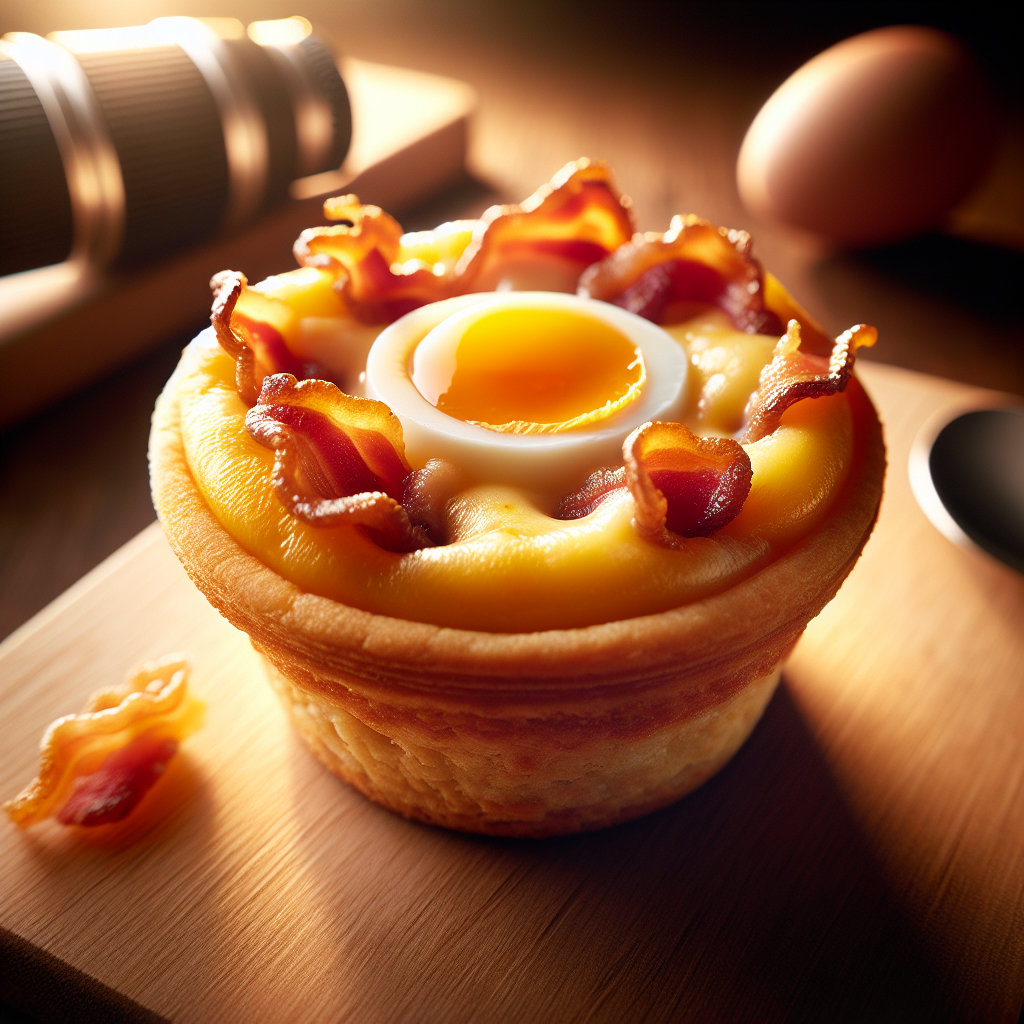

In [23]:
Image.open("recipe.png")

In [22]:
print(recipe)

Recipe Title: Cheesy Bacon and Egg Breakfast Muffins

Description: These Cheesy Bacon and Egg Breakfast Muffins are a delicious and portable breakfast option that is perfect for busy mornings. Packed with crispy bacon, gooey cheese, and wholesome eggs, they are guaranteed to satisfy your taste buds and keep you energized throughout the day.

Ingredients:
- 6 slices of bacon
- 6 large eggs
- 1 cup shredded cheddar cheese
- Salt and pepper, to taste

Instructions:
1. Preheat your oven to 375°F (190°C). Grease a muffin tin with cooking spray or line it with paper liners.

2. In a large skillet, cook the bacon over medium heat until crispy. Transfer the cooked bacon to a plate lined with a paper towel to drain excess grease. Allow it to cool, and then crumble it into small pieces.

3. In a bowl, beat the eggs until well combined. Season with salt and pepper according to your taste preferences.

4. Place a spoonful of crumbled bacon into each muffin cup, reserving some for topping. Follow t